In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

In [2]:
def latexFont(size= 15, labelsize=18, titlesize=20, ticklabelssize=15, legendsize = 18):
    plt.rcParams.update({
        "text.usetex": True})
    plt.rcParams["text.latex.preamble"].join([
        r"\usepackage{underscore}"
    ])
    plt.rcParams["font.family"] = 'STIXGeneral'
    plt.rc('font', size=size)          # controls default text sizes
    plt.rc('axes', titlesize=titlesize)     # fontsize of the axes title
    plt.rc('axes', labelsize=labelsize)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=ticklabelssize)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=ticklabelssize)    # fontsize of the tick labels
    plt.rc('legend', fontsize=legendsize)    # legend fontsize
    plt.rc('figure', titlesize=titlesize)  # fontsize of the figure title
    
latexFont()

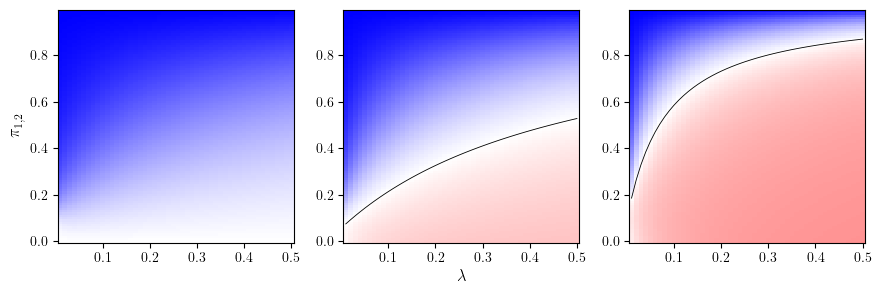

In [31]:
latexFont(ticklabelssize=10, labelsize=12)
fig, ax = plt.subplots(1,3,figsize=(9,3.2))
q1s, q2 = [5,7,9], 10
x = 2
for i,q1 in enumerate(q1s):
    fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
    Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
    max = abs(Qmesh).max()
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, vmin = -max, vmax = max, cmap='bwr_r', shading='nearest')
    if i > 0:
        tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
        tline = tline.query('pi >= 0.01')
        ax[i].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.6)
ax[0].set_ylabel(r'$\pi_{1,2}$')
ax[1].set_xlabel(r'$\lambda$')
fig.tight_layout()
fig.savefig(f'stateSpace_sym_q1_multiplot_q2_{q2}_f2_{int(x)}f1.pdf')

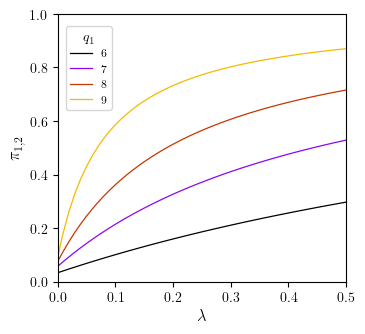

In [16]:
latexFont(ticklabelssize=10, labelsize=12, legendsize=8)
fig, ax = plt.subplots(1,1,figsize=(3.9,3.6))
q1s, q2 = [6,7,8,9], 10
colors = plt.cm.gnuplot(np.linspace(0,0.9,len(q1s)))
x = 2
for q1,c in zip(q1s, colors):
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi'], tline['lambda'], color=c, lw=0.9, label=f'{q1}')
ax.set(xlabel=r'$\lambda$', ylabel=r'$\pi_{1,2}$', xlim=(0,0.5), ylim=(0,1)) 
fig.tight_layout()
fig.legend(title=r'$q_1$', title_fontsize=10, loc=(0.18,0.67))
fig.savefig(f'tlines_sym_q2_{q2}_f2_2f1_paper.pdf')